## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 모델성능평가
- 평가일 : 22.9.19
- 성명 : 신창훈
- 점수 : 70

Q1. iris data를 불러와서 붓꽃의 종류를 분류하는 모델링을 수행한 후 오차행렬과 정확도를 평가하세요.
- test_size = 0.2, 분류기는 DecisionTreeClassifier를 이용

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier

x_data = iris.data
y_data = iris.target

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=111)

dcf = DecisionTreeClassifier()
dcf.fit(x_train, y_train)

pred = dcf.predict(x_test)

print('오차행렬도 : \n',confusion_matrix(y_test, pred))
print('정확도 : ', accuracy_score(y_test, pred))

오차행렬도 : 
 [[10  0  0]
 [ 0  5  2]
 [ 0  1 12]]
정확도 :  0.9


Q2. 타이타닉 분석용 데이터세트인 tdf1.pkl를 불러와서 생존자 예측 모델을 만든 후 오차행렬, 정확도, 재현율, f1, AUC를 포함하는 사용자 함수를 활용하여 평가하세요.
- test_size = 0.2, 분류기는 RandomForestClassifier 이용

In [228]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
tdf = pd.read_pickle('tdf1.pkl')
tdf.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [229]:
def contest(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬도 : \n', np.round(confusion,4))
    print('정확도 : ', np.round(accuracy,4))
    print('재현율 : ', np.round(recall,4))
    print('F1_Score : ', np.round(f1,4))
    print('roc_auc_score :', np.round(roc_auc,4))
    

In [230]:
x_data = tdf.drop('Survived', axis=1, inplace=False)
y_data = tdf.Survived

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=10)

rcf = RandomForestClassifier()
rcf.fit(x_train, y_train)

pred = rcf.predict(x_test)
pred_proba = rcf.predict_proba(x_test)[:,1]

contest(y_test, pred, pred_proba)

오차행렬도 : 
 [[105  12]
 [ 15  47]]
정확도 :  0.8492
재현율 :  0.7581
F1_Score :  0.7769
roc_auc_score : 0.8781


Q3. Q2에서 생성한 모델로 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.

In [222]:
from sklearn.model_selection import cross_val_score

fold_5=cross_val_score(rcf, x_data, y_data, scoring = 'accuracy',cv=5)

print('5fold 정확도 : ', np.round(fold_5, 4))
print('평균 정확도 : ', np.round(np.mean(fold_5), 4))

5fold 정확도 :  [0.7877 0.8034 0.7921 0.7753 0.8315]
평균 정확도 :  0.798


Q4. Q2에서 생성한 예측모델에 대하여 교차 검증 및 성능 개선을 수행하세요.(GridSearchCV 활용)

In [231]:
from sklearn.model_selection import GridSearchCV

parameter = {'n_estimators':[50,100,200],'max_depth':[2,4,6,8,10], 'min_samples_split':[2,8,14,20],'min_samples_leaf':[2,8,14,20]}

grid_rd=GridSearchCV(rcf, param_grid=parameter, cv=5, refit=True)

grid_rd.fit(x_train, y_train)

# score_df = pd.DataFrame(grid_rd.cv_results_)
# score_df.head()

print('GridSearchCV 최적 파라미터:', grid_rd.best_params_)
print('GridSearchCV 최고 정확도:', np.round(grid_rd.best_score_,4))

best_rd = grid_rd.best_estimator_
rclf_pred = best_rd.predict(x_test)
rclf_pred_proba = best_rd.predict_proba(x_test)[:,1]
contest(y_test,rclf_pred,rclf_pred_proba)

GridSearchCV 최적 파라미터: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 200}
GridSearchCV 최고 정확도: 0.8202
오차행렬도 : 
 [[104  13]
 [ 14  48]]
정확도 :  0.8492
재현율 :  0.7742
F1_Score :  0.7805
roc_auc_score : 0.8604


Q5 ~ Q7. 'dataset/diabetes.csv'을 불러와서 아래사항을 수행하세요.
- 피마 인디언 당뇨병 예측을 로지스틱 회귀를 이용하여 수행하고 사용자 함수를 작성하여 평가(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)
- 임곗값을 0.3에서 0.5까지 변화시키면서 정밀도와 재현율이 조정되는 과정을 시각화 
- 재현율 기준의 성능을 개선하기 위하여 그 값이 0이 될 수 없는 각 칼럼을 탐색하여 적절한 처리를 한 후 로지스틱 회귀로 예측 및 평가 수행(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)


In [184]:
ddf = pd.read_csv('diabetes.csv')
ddf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
x_data = ddf.iloc[:, :-1]
y_data = ddf.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 156, stratify=y_data)
lcf = LogisticRegression()
lcf.fit(x_train, y_train)

pred = lcf.predict(x_test)
pred_proba = lcf.predict_proba(x_test)[:,1]

In [193]:
# 사용자 함수
def contest(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬도 : \n', np.round(confusion,4))
    print('정확도 : ', np.round(accuracy,4))
    print('정밀도 : ', np.round(precision,4))
    print('재현율 : ', np.round(recall,4))
    print('F1_Score : ', np.round(f1,4))
    print('roc_auc_score :', np.round(roc_auc,4))

contest(y_test, pred, pred_proba)

오차행렬도 : 
 [[88 12]
 [23 31]]
정확도 :  0.7727
정밀도 :  0.7209
재현율 :  0.5741
F1_Score :  0.6392
roc_auc_score : 0.7919


In [92]:
pred_proba_1 = pred_proba.reshape(-1,1)

In [194]:
from sklearn.preprocessing import Binarizer

threshold = [0.3, 0.35, 0.4, 0.45, 0.5]

for custom_threshold in threshold:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    print('\n 임곗값 :', custom_threshold)
    contest(y_test, custom_predict, pred_proba)


 임곗값 : 0.3
오차행렬도 : 
 [[56 44]
 [23 31]]
정확도 :  0.5649
정밀도 :  0.4133
재현율 :  0.5741
F1_Score :  0.4806
roc_auc_score : 0.7919

 임곗값 : 0.35
오차행렬도 : 
 [[59 41]
 [27 27]]
정확도 :  0.5584
정밀도 :  0.3971
재현율 :  0.5
F1_Score :  0.4426
roc_auc_score : 0.7919

 임곗값 : 0.4
오차행렬도 : 
 [[63 37]
 [30 24]]
정확도 :  0.5649
정밀도 :  0.3934
재현율 :  0.4444
F1_Score :  0.4174
roc_auc_score : 0.7919

 임곗값 : 0.45
오차행렬도 : 
 [[70 30]
 [32 22]]
정확도 :  0.5974
정밀도 :  0.4231
재현율 :  0.4074
F1_Score :  0.4151
roc_auc_score : 0.7919

 임곗값 : 0.5
오차행렬도 : 
 [[72 28]
 [34 20]]
정확도 :  0.5974
정밀도 :  0.4167
재현율 :  0.3704
F1_Score :  0.3922
roc_auc_score : 0.7919


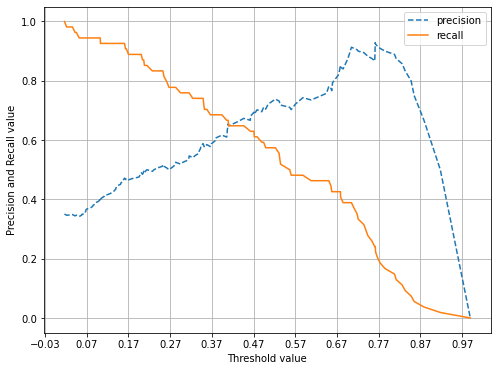

In [195]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 scale을 0.1단위로 변경
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, pred_proba)

In [97]:
ddf.describe()
# Glucose, SkinThickness, BloodPressure,Insulin,BMI는 0이 될 수 없다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [98]:
mean_zero = ddf[['Glucose','SkinThickness','BloodPressure','Insulin','BMI']].mean()
ddf[['Glucose','SkinThickness','BloodPressure','Insulin','BMI']] = ddf[['Glucose','SkinThickness','BloodPressure','Insulin','BMI']].replace(0,mean_zero)

In [99]:
ddf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [141]:
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

x_data = ddf.drop('Outcome', axis=1, inplace=False)
y_data = ddf.Outcome

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.2, random_state=111)

lcf = LogisticRegression()
lcf.fit(x_train, y_train)

pred = lcf.predict(x_test)
pred_proba = lcf.predict_proba(x_test)[:,1]

contest(y_test,pred,pred_proba)

오차행렬도 : 
 [[86 15]
 [24 29]]
정확도 :  0.7468
정밀도 :  0.6591
재현율 :  0.5472
F1_Score :  0.5979
roc_auc_score : 0.8233


Q8. "dataset/auto-mpg.xlsx"을 불러와서 회귀 모델을 생성하고 MSE, RMSE, R2로 평가를 수행하세요.

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

auto_df = pd.read_excel('auto-mpg.xlsx')
auto_df.head()

auto_df.horsepower.replace('?', np.nan, inplace= True)
auto_df.dropna(inplace=True)

auto_df.drop('car name', axis=1, inplace=True)

auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [178]:
x_data = auto_df.drop('mpg', axis=1, inplace=False)
y_data = auto_df.mpg

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=11)

lrcf = LinearRegression()
lrcf.fit(x_train, y_train)

pred = lrcf.predict(x_test)

print('MSE : ',np.round(mean_squared_error(y_test, pred),4))
print('RMSE :', np.round(np.sqrt(mean_squared_error(y_test, pred)),4))
print('R2 :', np.round(r2_score(y_test.values[::], pred),4))

MSE :  12.7813
RMSE : 3.5751
R2 : 0.7931


Q9. 'load_boston' 을 불러와서 cross_val_score를 이용한 cv=5인 교차검증을 수행 후 MSE, RMSE를 출력하세요.(LineaRegression) 

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold

house = load_boston()

In [169]:
x_data = house.data
y_data = house.target

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=111)

lrcf = LinearRegression()

In [172]:
fold_5=cross_val_score(lrcf, x_data, y_data, scoring="neg_mean_squared_error",cv=5)

print('5 folds의 개별 Negative MSE scores: ', np.round(fold_5, 4))
print('5 folds의 개별 RMSE scores: ', np.round(np.sqrt(-1*fold_5), 4))
print('평균 RMSE :', np.round(np.mean(np.sqrt(-1*fold_5)),4))

5 folds의 개별 Negative MSE scores:  [-12.4603 -26.0486 -33.0741 -80.7624 -33.3136]
5 folds의 개별 RMSE scores:  [3.5299 5.1038 5.751  8.9868 5.7718]
평균 RMSE : 5.8287


Q10. 'Q9에 대하여 R2 Score를 구하세요.(k=5) 

In [175]:
cv = KFold(5, shuffle=True, random_state=0)
r2_scores = cross_val_score(lrcf, x_data, y_data, scoring='r2', cv = cv)
r2_score = np.mean(r2_scores)

print('각 fold별 r2_score :', np.round(r2_scores,4))
print('평균 r2_score : ', np.round(r2_score,4))

각 fold별 r2_score : [0.5892 0.778  0.6679 0.668  0.8395]
평균 r2_score :  0.7085
